In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variables symboliques
x = sp.symbols('x')
y = sp.Function('y')

# ===== ÉDO=====
f_expr = y(x) - x**2 + 1           # y' = f(x,y)
x0 = 0
y0 = 0.5

ode = sp.Eq(sp.diff(y(x), x), f_expr)

sol_exacte = None
try:
    sol = sp.dsolve(ode, ics={y(x0): y0})
    sol_exacte = sp.simplify(sol.rhs)
    print("Solution exacte trouvée :")
    sp.pprint(sol_exacte)
except:
    print("Solution exacte non disponible (SymPy).")

# f(x,y) numérique
f_num = sp.lambdify((x, y(x)), f_expr, "numpy")

# Solution exacte numérique si elle existe
if sol_exacte is not None:
    y_exact_num = sp.lambdify(x, sol_exacte, "numpy")

Solution exacte trouvée :
 2              x    
x  + 2⋅x - 0.5⋅ℯ  + 1


In [6]:
def euler_modifie(f, x0, y0, h, N):
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)

    x_vals[0], y_vals[0] = x0, y0

    for n in range(N):
        k1 = f(x_vals[n], y_vals[n])
        k2 = f(x_vals[n] + h, y_vals[n] + h * k1)
        y_vals[n+1] = y_vals[n] + h * 0.5 * (k1 + k2)
        x_vals[n+1] = x_vals[n] + h

    return x_vals, y_vals

def heun(f, x0, y0, h, N):
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)

    x_vals[0], y_vals[0] = x0, y0

    for n in range(N):
        k1 = f(x_vals[n], y_vals[n])
        k2 = f(x_vals[n] + h/2, y_vals[n] + h/2 * k1)
        y_vals[n+1] = y_vals[n] + h * k2
        x_vals[n+1] = x_vals[n] + h

    return x_vals, y_vals

def rk4(f, x0, y0, h, N):
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)

    x_vals[0], y_vals[0] = x0, y0

    for n in range(N):
        k1 = f(x_vals[n], y_vals[n])
        k2 = f(x_vals[n] + h/2, y_vals[n] + h/2 * k1)
        k3 = f(x_vals[n] + h/2, y_vals[n] + h/2 * k2)
        k4 = f(x_vals[n] + h, y_vals[n] + h * k3)

        y_vals[n+1] = y_vals[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x_vals[n+1] = x_vals[n] + h

    return x_vals, y_vals


In [7]:
# Example usage
h = 0.1
N = 20

x_e, y_e = euler_modifie(f_num, x0, y0, h, N)
x_h, y_h = heun(f_num, x0, y0, h, N)
x_r, y_r = rk4(f_num, x0, y0, h, N)


<Figure size 800x500 with 0 Axes>

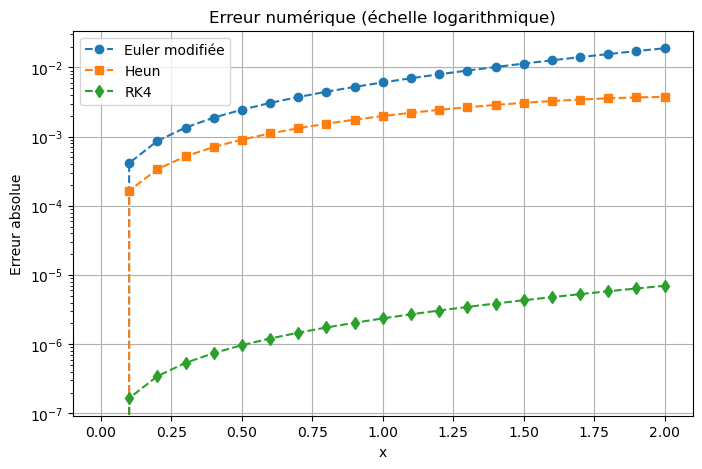

In [8]:
# representation graphique
plt.figure(figsize=(8,5))

if sol_exacte is not None:
    y_ex = y_exact_num(x_e)

    err_e = np.abs(y_e - y_ex)
    err_h = np.abs(y_h - y_ex)
    err_r = np.abs(y_r - y_ex)

    plt.figure(figsize=(8,5))
    plt.semilogy(x_e, err_e, 'o--', label="Euler modifiée")
    plt.semilogy(x_h, err_h, 's--', label="Heun")
    plt.semilogy(x_r, err_r, 'd--', label="RK4")

    plt.xlabel("x")
    plt.ylabel("Erreur absolue")
    plt.title("Erreur numérique (échelle logarithmique)")
    plt.legend()
    plt.grid(True)
    plt.show()
